In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import linregress
from sklearn.cluster import KMeans

In [16]:
path = "./examples/series_01.csv"

In [17]:
df = pd.read_csv(path)
df.shape[0]

816

In [18]:
df.head()

,id,x [nm],y [nm],sigma [nm],intensity [photon],uncertainty_xy [nm]
0,1,12886.03135,15329.57455,253.18023,9360.30665,6.52939
1,2,13073.14426,13939.38825,271.41933,8359.28749,5.31591
2,3,13387.79332,14910.78254,444.07739,31480.11359,5.74411
3,4,13450.54301,16265.82093,291.43137,7083.19266,11.65476
4,5,13495.59220,16593.38287,406.55681,28835.37203,6.02487


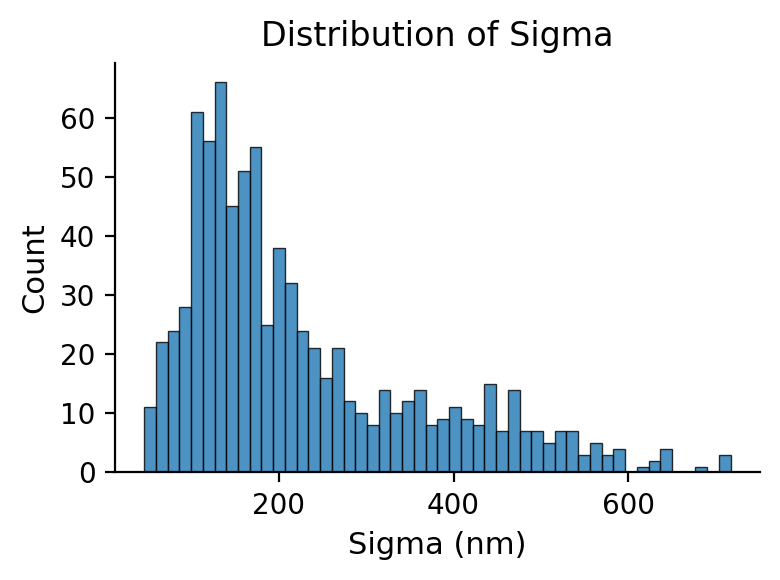

In [19]:
plt.figure(figsize=(4, 3), dpi=200)

plt.hist(
    df["sigma [nm]"],
    bins=50,
    edgecolor="black",
    linewidth=0.5,
    alpha=0.8
)

plt.xlabel("Sigma (nm)", fontsize=11)
plt.ylabel("Count", fontsize=11)
plt.title("Distribution of Sigma", fontsize=12)

# Remove top/right spines
ax = plt.gca()
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.tight_layout()
plt.show()


In [ ]:
X = df[["sigma [nm]"]]   # must stay 2D for sklearn
X = df[["sigma [nm]"]].dropna()

kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

df.loc[X.index, "cluster"] = labels

plt.figure(figsize=(6,4), dpi=200)

for cluster in sorted(df["cluster"].dropna().unique()):
    subset = df[df["cluster"] == cluster]
    plt.hist(subset["sigma [nm]"], bins=50, alpha=0.5, label=f"Cluster {cluster}")

plt.xlabel("Sigma (nm)")
plt.ylabel("Count")
plt.legend()

plt.show()

In [ ]:
def scatter_plot(df, x_col, y_col):
    plt.figure(figsize=(4, 4), dpi=150)
    plt.scatter(df[x_col], df[y_col], alpha=0.6)
    
    plt.xlabel(x_col.replace("_", " "))
    plt.ylabel(y_col.replace("_", " "))
    
    plt.tight_layout()
    plt.show()

In [ ]:
scatter_plot(df, "sigma [nm]", "intensity [photon]")

In [ ]:
means = df.groupby("sigma [nm]")["intensity [photon]"].mean()
plt.bar(means.index, means.values)
plt.xlabel("sigma [nm]")
plt.ylabel("Mean intensity [photon]")
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Select two columns
n_clusters = 3
X = df[["sigma [nm]", "intensity [photon]"]].dropna()

# Run clustering (choose number of clusters)
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
labels = kmeans.fit_predict(X)

centers = kmeans.cluster_centers_
sigma_centers = centers[:, 0]
intensity_centers = centers[:, 1]
print("Cluster centers (sigma [nm], intensity [photon]):")
for i in range(len(sigma_centers)):
    print(f"Cluster {i}: ({sigma_centers[i]:.2f}, {intensity_centers[i]:.2f})")

# Plot result
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=labels)
plt.xlabel("sigma [nm]")
plt.ylabel("intensity [photon]")
plt.show()

In [ ]:
df_bright = df[df["sigma [nm]"] > 400]
df_medium = df[(df["sigma [nm]"] > 150) & (df["sigma [nm]"] <= 400)]
df_dark = df[df["sigma [nm]"] <= 150]

print("Bright foci count:", df_bright.shape[0])
print("Medium foci count:", df_medium.shape[0])
print("Dark foci count:", df_dark.shape[0])

In [ ]:
df1 = df[df["sigma [nm]"] > 500]
print("Bright foci count:", df1.shape[0])